<a href="https://colab.research.google.com/github/VinayDhiman001/Object-Detection./blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics # installing the Ultralytics library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Connects your drive to colab

Mounted at /content/drive


In [ ]:
yaml_content = """
train: /content/drive/MyDrive/Data/Images/Train
val: /content/drive/MyDrive/Data/Images/Train  # Using same data for validation

nc: 3  # Number of classes
names: ['Animals', 'Wind-Turbines', 'Vehicles']  # Update class names accordingly
"""

with open("data.yaml", "w") as f:
    f.write(yaml_content)

#defines the traing path
#defines the objects and classes

In [ ]:
# Check if the Images/Train directory contains images
import os #helps us to intract with OS
image_path = '/content/drive/MyDrive/Data/images/train' #path for images
print(f"Images found: {len([f for f in os.listdir(image_path) if f.endswith(('.jpg', '.jpeg', '.png'))])}") #list all the files in these formats

# Check if the Labels/Train directory exists and contains label files
label_path = '/content/drive/MyDrive/Data/labels/train' #labels path
if os.path.exists(label_path): #checks if the label directroy exists
    print(f"Labels found: {len([f for f in os.listdir(label_path) if f.endswith('.txt')])}") #list all the files in it having format .txt
else:
    print(f"Label directory not found at {label_path}") #if no directroy found print this

Images found: 1149
Labels found: 1149


In [ ]:
# Check if image and label filenames match
import os
from pathlib import Path #to handle file names easily

image_files = [f for f in os.listdir(image_path) if f.endswith(('.jpg', '.jpeg', '.png'))] #list of images
label_files = [f for f in os.listdir(label_path) if f.endswith('.txt')] if os.path.exists(label_path) else [] #list of labels

image_basenames = [Path(f).stem for f in image_files] #removing extension name from base name of image
label_basenames = [Path(f).stem for f in label_files] #removing extension name from base name of labels

matching_files = set(image_basenames).intersection(set(label_basenames)) #finding comman names b/w images and labels
print(f"Total images: {len(image_files)}") #no. of images
print(f"Total labels: {len(label_files)}") #no. of labels
print(f"Matching pairs: {len(matching_files)}") #How many image-label pairs actually match by name.

# Sample a few file names to check
print("\nSample image files:", image_basenames[:5])
print("\nSample label files:", label_basenames[:5] if label_files else "No label files found")

Total images: 1149
Total labels: 1149
Matching pairs: 1149

Sample image files: ['20 (22)', '20 (2)', '20 (27)', '20 (14)', '20 (66)']

Sample label files: ['c9a5e15cd1cde00c', 'f17c21d7591c770e', '429416328cba8be8', 'bce8878dfdedef09', 'f67400825341e3f0']


In [ ]:
# Find the mismatched file
image_basenames_set = set(image_basenames)
label_basenames_set = set(label_basenames)

# Images without corresponding labels
images_without_labels = image_basenames_set - label_basenames_set #tells us how many images are without labels
if images_without_labels:
    print(f"Images without labels: {images_without_labels}") #if there are images without labels it will display them

# Labels without corresponding images
labels_without_images = label_basenames_set - image_basenames_set #this will tell the labels without images
if labels_without_images:
    print(f"Labels without images: {labels_without_images}") #it will display them

In [ ]:
import os

# === CONFIGURE THESE PATHS ===
image_folder = '/content/drive/MyDrive/Data/images/train'
label_folder = '/content/drive/MyDrive/Data/labels/train'

# === ALLOWED EXTENSIONS ===
image_exts = {'.jpg', '.jpeg', '.png'}
label_ext = '.txt'

# === Get base names of image files ===
image_basenames = {
    os.path.splitext(fname)[0].lower()
    for fname in os.listdir(image_folder)
    if os.path.splitext(fname)[1].lower() in image_exts
}

# === Delete unmatched label files ===
deleted_labels = []

for label_file in os.listdir(label_folder):
    if not label_file.endswith(label_ext):
        continue
    base = os.path.splitext(label_file)[0].lower()
    if base not in image_basenames:
        full_path = os.path.join(label_folder, label_file)
        os.remove(full_path)
        deleted_labels.append(label_file)

# === Report deleted labels ===
if deleted_labels:
    print("Deleted unmatched label files:")
    for label in deleted_labels:
        print(" -", label)
else:
    print("No unmatched label files found.")


No unmatched label files found.


In [ ]:
# Check if image and label filenames match
import os
from pathlib import Path

image_files = [f for f in os.listdir(image_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
label_files = [f for f in os.listdir(label_path) if f.endswith('.txt')] if os.path.exists(label_path) else []

image_basenames = [Path(f).stem for f in image_files]
label_basenames = [Path(f).stem for f in label_files]

matching_files = set(image_basenames).intersection(set(label_basenames))
print(f"Total images: {len(image_files)}")
print(f"Total labels: {len(label_files)}")
print(f"Matching pairs: {len(matching_files)}")

# Sample a few file names to check
print("\nSample image files:", image_files[:5])
print("\nSample label files:", label_files[:5] if label_files else "No label files found")

Total images: 1149
Total labels: 1149
Matching pairs: 1149

Sample image files: ['20 (22).jpg', '20 (2).jpg', '20 (27).jpg', '20 (14).jpg', '20 (66).jpg']

Sample label files: ['c9a5e15cd1cde00c.txt', 'f17c21d7591c770e.txt', '429416328cba8be8.txt', 'bce8878dfdedef09.txt', 'f67400825341e3f0.txt']


In [ ]:
import os

# === CONFIGURE YOUR FOLDERS ===
image_folder = '/content/drive/MyDrive/Data/images/train'
label_folder = '/content/drive/MyDrive/Data/labels/train'

# === VALID EXTENSIONS ===
image_exts = {'.jpg', '.jpeg', '.png'}
label_ext = '.txt'

# === Collect image and label filenames without extensions ===
image_files = {
    os.path.splitext(f)[0].lower(): f
    for f in os.listdir(image_folder)
    if os.path.splitext(f)[1].lower() in image_exts
}

label_files = {
    os.path.splitext(f)[0].lower(): f
    for f in os.listdir(label_folder)
    if f.endswith(label_ext)
}

# === Match labels with corresponding images ===
print("Matching Labels and Images:")
for base_name in sorted(label_files.keys()):
    if base_name in image_files:
        image_file = image_files[base_name]
        label_file = label_files[base_name]
        print(f"Label '{label_file}' ↔ Image '{image_file}'")
    else:
        print(f"Label '{label_files[base_name]}' ❌ No matching image")

# === Optionally show images without labels too ===
unmatched_images = set(image_files.keys()) - set(label_files.keys())
if unmatched_images:
    print("\nImages without matching labels:")
    for base_name in sorted(unmatched_images):
        print(f"Image '{image_files[base_name]}' ❌ No matching label")


Matching Labels and Images:
Label '0064360fc5b84cd6.txt' ↔ Image '0064360fc5b84cd6.jpg'
Label '00786613c677a616.txt' ↔ Image '00786613c677a616.jpg'
Label '0151984ed299950b.txt' ↔ Image '0151984ed299950b.jpg'
Label '01557950bb2f0f08.txt' ↔ Image '01557950bb2f0f08.jpg'
Label '01650042709e7a82.txt' ↔ Image '01650042709e7a82.jpg'
Label '0215b972cb19e575.txt' ↔ Image '0215b972cb19e575.jpg'
Label '035205673c0ae617.txt' ↔ Image '035205673c0ae617.jpg'
Label '03554c643754a58d.txt' ↔ Image '03554c643754a58d.jpg'
Label '03989f930b354f30.txt' ↔ Image '03989f930b354f30.jpg'
Label '049910324f8b893b.txt' ↔ Image '049910324f8b893b.jpg'
Label '055747f5734e6007.txt' ↔ Image '055747f5734e6007.jpg'
Label '06814bb960f26852.txt' ↔ Image '06814bb960f26852.jpg'
Label '06822fe351ce9760.txt' ↔ Image '06822fe351ce9760.jpg'
Label '07219696b2145fea.txt' ↔ Image '07219696b2145fea.jpg'
Label '08106ac0bce4f1c0.txt' ↔ Image '08106ac0bce4f1c0.jpg'
Label '088225458e5ccf2f.txt' ↔ Image '088225458e5ccf2f.jpg'
Label '09357

In [ ]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('yolov8s.pt')  # You can also use 'yolov8n.pt', 'yolov8m.pt', etc.


100%|██████████| 21.5M/21.5M [00:00<00:00, 240MB/s]


In [ ]:
yaml_content = """
train: /content/drive/MyDrive/Data/images/train
val: /content/drive/MyDrive/Data/images/train  # Using same data for validation

nc: 3  # Number of classes
names: ['Animals', 'Wind-Turbines', 'Vehicles']  # Update class names accordingly
"""

with open("data.yaml", "w") as f:
    f.write(yaml_content)


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')
model.train(data="data.yaml", epochs=50,imgsz=640, batch=16, name='yolov8_custom')


Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, prof

100%|██████████| 755k/755k [00:00<00:00, 19.5MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2117209  ultralytics.nn.modules.head.Detect           [3, [128, 256, 512]]          
Model summary: 129 layers, 11,136,761 parameters, 11,136,745 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 88.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 1.0±0.4 MB/s, size: 369.1 KB)


train: Scanning /content/drive/MyDrive/Data/labels/train.cache... 1149 images, 1150 backgrounds, 0 corrupt: 100%|██████████| 2299/2299 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.8±0.9 MB/s, size: 271.9 KB)


val: Scanning /content/drive/MyDrive/Data/labels/train.cache... 1149 images, 1150 backgrounds, 0 corrupt: 100%|██████████| 2299/2299 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_custom
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.64G      1.423      2.258      1.293         54        640: 100%|██████████| 144/144 [05:45<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.01it/s]


                   all       2299       4994      0.337      0.569      0.322      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.67G      1.437      1.773      1.315         38        640: 100%|██████████| 144/144 [01:04<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  1.98it/s]


                   all       2299       4994      0.332      0.619      0.351      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.67G      1.454      1.755      1.326         18        640: 100%|██████████| 144/144 [01:04<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  1.99it/s]


                   all       2299       4994      0.337      0.514      0.303      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       5.7G      1.446      1.665        1.3         61        640: 100%|██████████| 144/144 [01:03<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:40<00:00,  1.79it/s]


                   all       2299       4994      0.376      0.585      0.355      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.73G      1.361      1.559       1.25         49        640: 100%|██████████| 144/144 [01:10<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:38<00:00,  1.86it/s]

                   all       2299       4994      0.362      0.621       0.36      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.77G      1.346      1.545      1.241         17        640: 100%|██████████| 144/144 [01:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:37<00:00,  1.94it/s]


                   all       2299       4994       0.36      0.707       0.38      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.77G      1.302      1.548      1.227         86        640: 100%|██████████| 144/144 [01:06<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.05it/s]


                   all       2299       4994      0.436      0.687      0.419      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       5.8G       1.25      1.462      1.184         39        640: 100%|██████████| 144/144 [01:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.02it/s]


                   all       2299       4994      0.419      0.737      0.422      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       5.8G      1.237      1.442      1.182         74        640: 100%|██████████| 144/144 [01:05<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  1.99it/s]


                   all       2299       4994      0.417      0.754      0.433      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       5.8G      1.167      1.374      1.147         49        640: 100%|██████████| 144/144 [01:03<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.03it/s]


                   all       2299       4994      0.445      0.775      0.443      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       5.8G      1.181       1.35      1.137         43        640: 100%|██████████| 144/144 [01:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:34<00:00,  2.07it/s]

                   all       2299       4994       0.44       0.79      0.444      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       5.8G      1.159      1.338      1.133         64        640: 100%|██████████| 144/144 [01:04<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:34<00:00,  2.06it/s]


                   all       2299       4994      0.442      0.785      0.452      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       5.8G       1.14      1.316      1.127         54        640: 100%|██████████| 144/144 [01:04<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]

                   all       2299       4994      0.427      0.812      0.453      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       5.8G      1.117      1.304      1.116         60        640: 100%|██████████| 144/144 [01:03<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  1.98it/s]

                   all       2299       4994      0.453      0.799      0.459      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       5.8G      1.106      1.281      1.102         72        640: 100%|██████████| 144/144 [01:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:34<00:00,  2.07it/s]

                   all       2299       4994      0.453      0.806      0.458      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       5.8G        1.1      1.254        1.1         37        640: 100%|██████████| 144/144 [01:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.05it/s]


                   all       2299       4994      0.434      0.825      0.458      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       5.8G       1.07      1.241      1.093         44        640: 100%|██████████| 144/144 [01:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]

                   all       2299       4994      0.456      0.836      0.465      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       5.8G      1.081      1.255      1.099         25        640: 100%|██████████| 144/144 [01:02<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  1.99it/s]

                   all       2299       4994       0.45      0.813      0.462      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       5.8G      1.056      1.253      1.091         27        640: 100%|██████████| 144/144 [01:02<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]

                   all       2299       4994      0.445      0.828      0.468      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       5.8G      1.056      1.221       1.09         38        640: 100%|██████████| 144/144 [01:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  1.96it/s]

                   all       2299       4994      0.444      0.833      0.465      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       5.8G      1.017      1.205      1.066         35        640: 100%|██████████| 144/144 [01:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:37<00:00,  1.94it/s]

                   all       2299       4994      0.446       0.85      0.464      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       5.8G      1.021      1.205      1.061         57        640: 100%|██████████| 144/144 [01:09<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:34<00:00,  2.06it/s]

                   all       2299       4994      0.465      0.828      0.472      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       5.8G      1.018      1.202      1.068         51        640: 100%|██████████| 144/144 [01:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.01it/s]

                   all       2299       4994      0.465      0.834      0.474      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       5.8G      1.008      1.203       1.07         51        640: 100%|██████████| 144/144 [01:04<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  1.98it/s]

                   all       2299       4994      0.469      0.845      0.474      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       5.8G     0.9845      1.176      1.054         61        640: 100%|██████████| 144/144 [01:03<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  2.00it/s]

                   all       2299       4994      0.457      0.856      0.471      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       5.8G     0.9646      1.172      1.048         39        640: 100%|██████████| 144/144 [01:06<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:34<00:00,  2.08it/s]

                   all       2299       4994      0.458      0.853      0.475      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       5.8G     0.9758      1.138       1.04         55        640: 100%|██████████| 144/144 [01:05<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  1.99it/s]

                   all       2299       4994      0.458      0.882      0.476      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       5.8G     0.9736      1.193      1.057         54        640: 100%|██████████| 144/144 [01:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:37<00:00,  1.90it/s]

                   all       2299       4994      0.471      0.848      0.479      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       5.8G     0.9588      1.118      1.034         66        640: 100%|██████████| 144/144 [01:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:34<00:00,  2.06it/s]

                   all       2299       4994      0.468      0.847      0.478      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       5.8G     0.9644      1.123      1.041         34        640: 100%|██████████| 144/144 [01:05<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  1.96it/s]

                   all       2299       4994      0.466      0.868       0.48      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       5.8G     0.9299      1.146      1.031         30        640: 100%|██████████| 144/144 [01:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  1.99it/s]

                   all       2299       4994      0.467      0.876      0.478      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       5.8G     0.9205      1.116      1.022         35        640: 100%|██████████| 144/144 [01:08<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:37<00:00,  1.91it/s]

                   all       2299       4994      0.473      0.852       0.48      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       5.8G     0.9263      1.131      1.028         50        640: 100%|██████████| 144/144 [01:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]

                   all       2299       4994      0.472      0.884      0.483      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       5.8G     0.9166      1.118      1.019         56        640: 100%|██████████| 144/144 [01:07<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.05it/s]

                   all       2299       4994      0.467      0.893      0.485      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       5.8G     0.9001      1.122       1.02         42        640: 100%|██████████| 144/144 [01:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.05it/s]

                   all       2299       4994      0.476      0.883      0.488      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       5.8G     0.8974      1.094      1.016         28        640: 100%|██████████| 144/144 [01:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:35<00:00,  2.01it/s]

                   all       2299       4994      0.469      0.894      0.486      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       5.8G     0.9081      1.092      1.007         60        640:  38%|███▊      | 55/144 [00:24<00:46,  1.91it/s]

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import Image, display


In [ ]:
# Automatically search for best.pt under /content/runs/detect
weights_path = None
base_path = "/content/runs/detect"

for folder in os.listdir(base_path):
    candidate = os.path.join(base_path, folder, "weights", "best.pt")
    if os.path.exists(candidate):
        weights_path = candidate
        break

if weights_path:
    print(f"Found model weights: {weights_path}")
else:
    raise FileNotFoundError("best.pt not found under /content/runs/detect")


Found model weights: /content/runs/detect/yolov8_custom/weights/best.pt


In [ ]:
model = YOLO(weights_path)


In [ ]:
test_image = "/content/drive/MyDrive/Data/images/train/eac093db0bf03905.jpg"  # Update this



image 1/1 /content/drive/MyDrive/Data/images/train/eac093db0bf03905.jpg: 480x640 1 Animals, 41.3ms
Speed: 2.7ms preprocess, 41.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


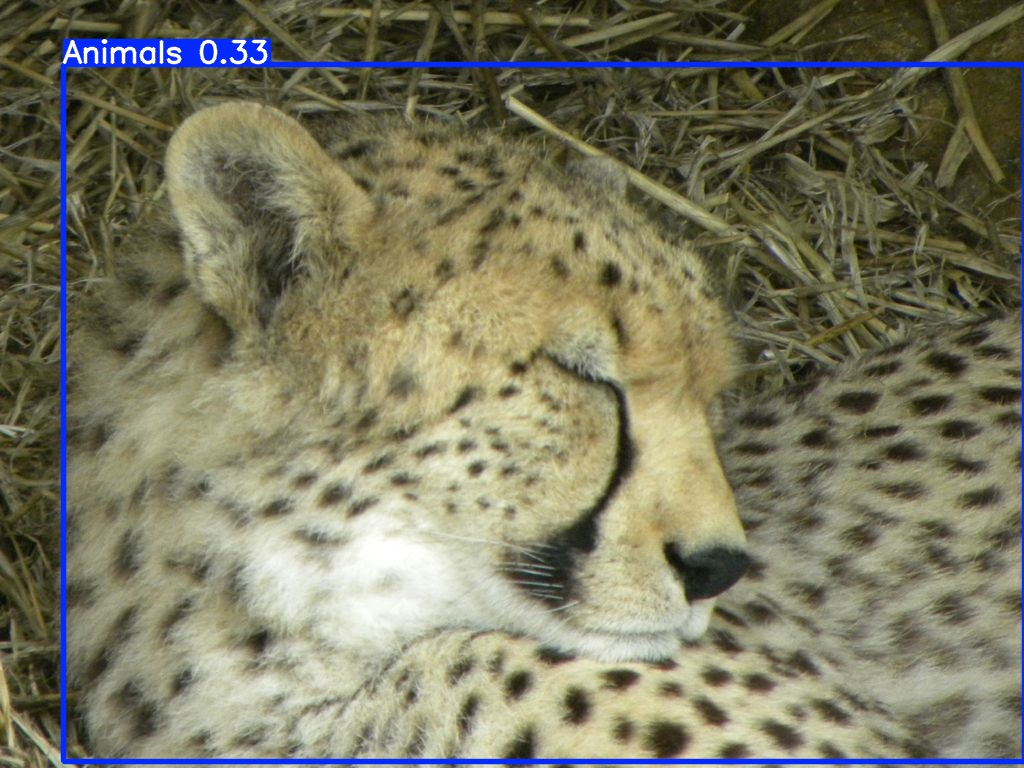

In [ ]:
results = model.predict(source=test_image, save=True, conf=0.1)

# Display result
result_image_path = "runs/detect/predict/" + os.path.basename(test_image)
display(Image(filename=result_image_path))


In [ ]:
import cv2
from matplotlib import pyplot as plt

# Re-run with results object
results = model.predict(source=test_image, conf=0.5)

# Show predictions from the first image
res = results[0]
img = res.plot()  # This draws boxes on the image

# Display using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
test_image = "/content/drive/MyDrive/Data/images/train/windmill14_jpg.rf.b11ac0d6bc898d0f43e596475ac60c06.jpg"  # Update this


image 1/1 /content/drive/MyDrive/Data/images/train/windmill14_jpg.rf.b11ac0d6bc898d0f43e596475ac60c06.jpg: 384x640 4 Wind-Turbiness, 45.8ms
Speed: 2.6ms preprocess, 45.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


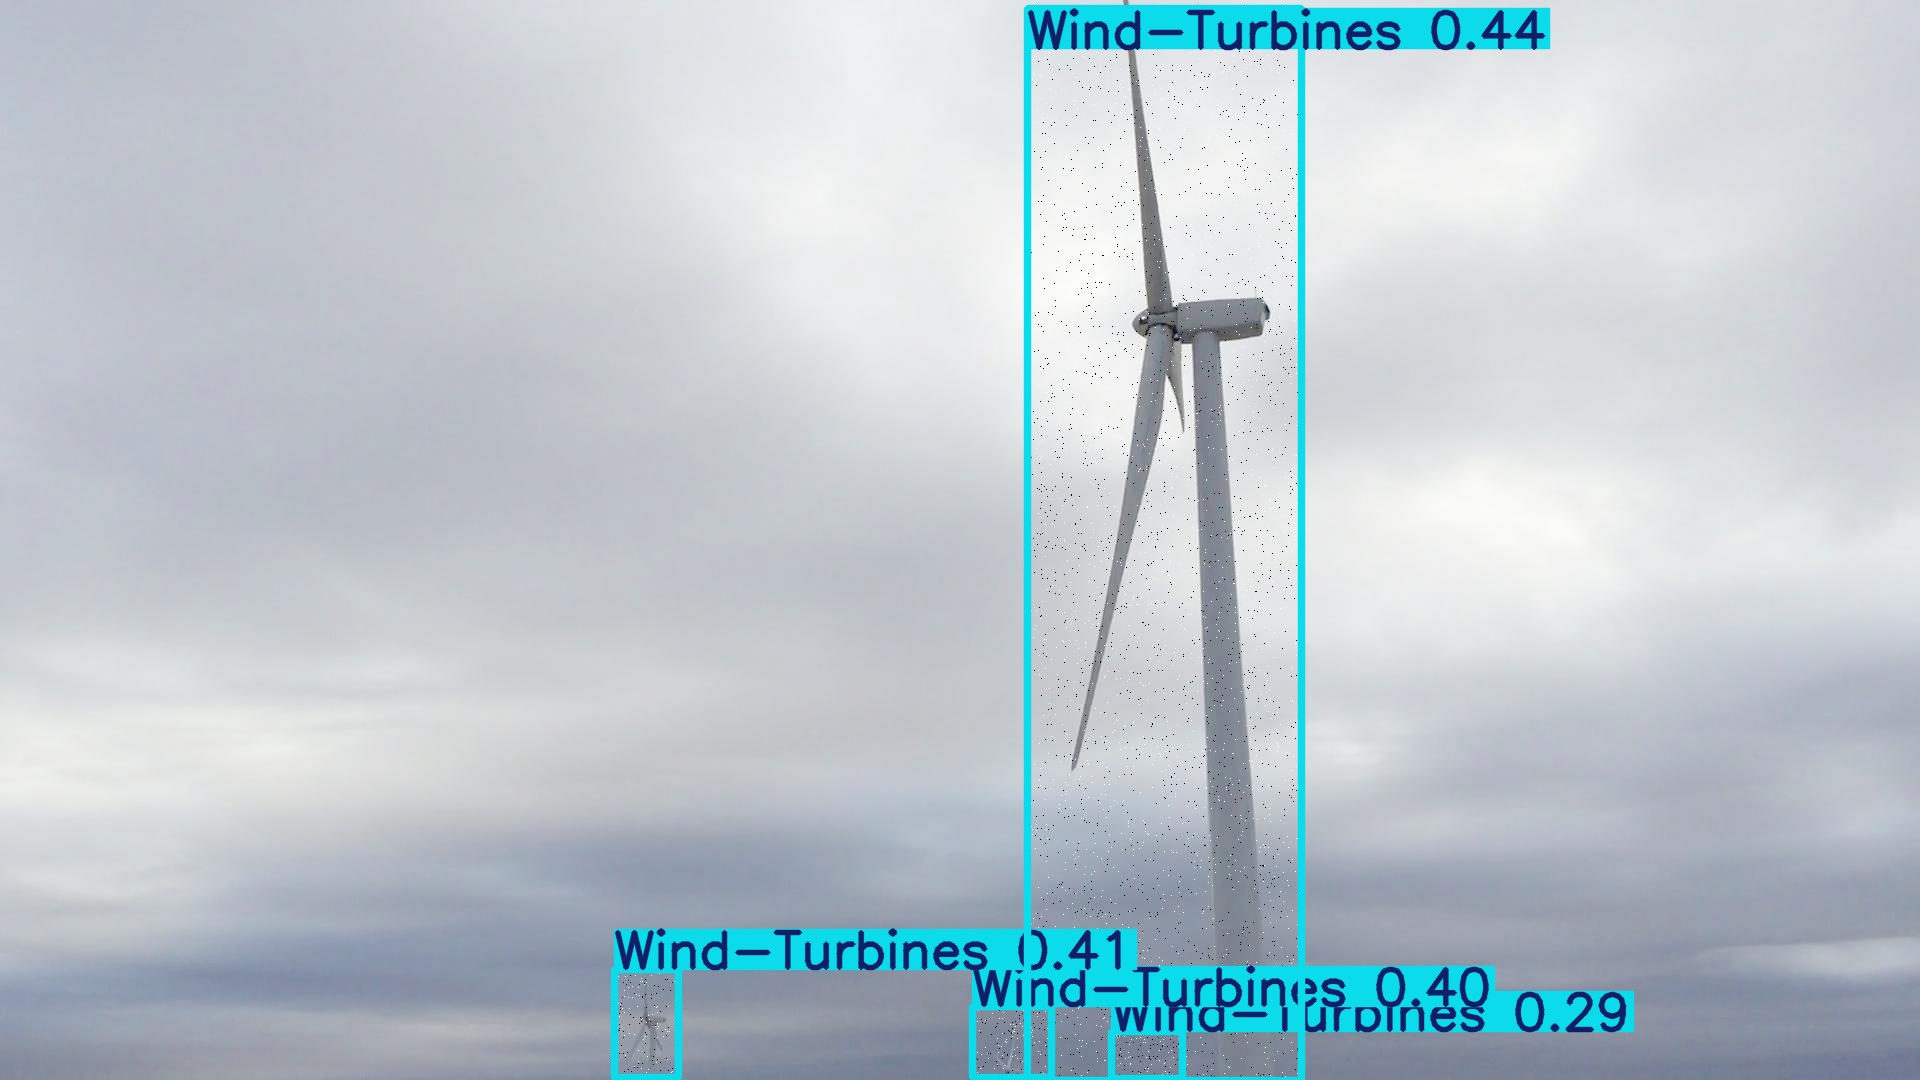

In [ ]:
results = model.predict(source=test_image, save=True, conf=0.1)

# Display result
result_image_path = "runs/detect/predict/" + os.path.basename(test_image)
display(Image(filename=result_image_path))


In [ ]:
test_image = "/content/drive/MyDrive/Data/images/train/f911ba1b29f49c58.jpg"  # Update this


image 1/1 /content/drive/MyDrive/Data/images/train/f911ba1b29f49c58.jpg: 640x480 1 Animals, 41.6ms
Speed: 3.6ms preprocess, 41.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


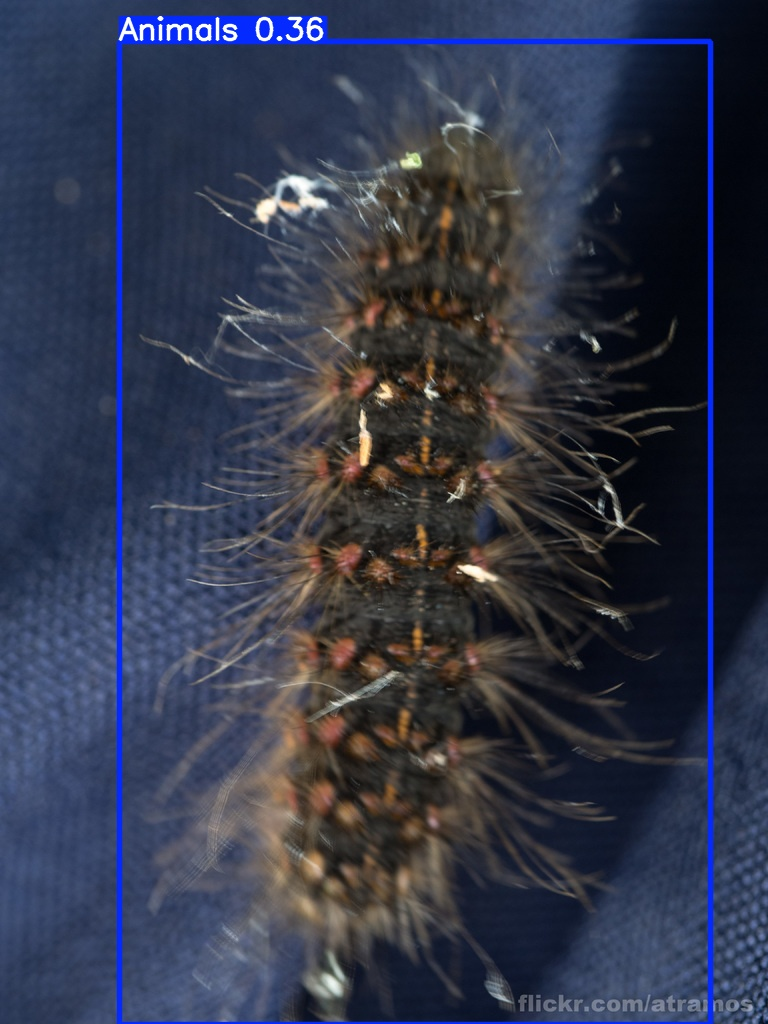

In [ ]:
results = model.predict(source=test_image, save=True, conf=0.1)

# Display result
result_image_path = "runs/detect/predict/" + os.path.basename(test_image)
display(Image(filename=result_image_path))


In [ ]:
test_image = "/content/drive/MyDrive/Data/images/train/18 (24).jpg"  # Update this


image 1/1 /content/drive/MyDrive/Data/images/train/18 (24).jpg: 384x640 10 Vehicless, 12.0ms
Speed: 3.9ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


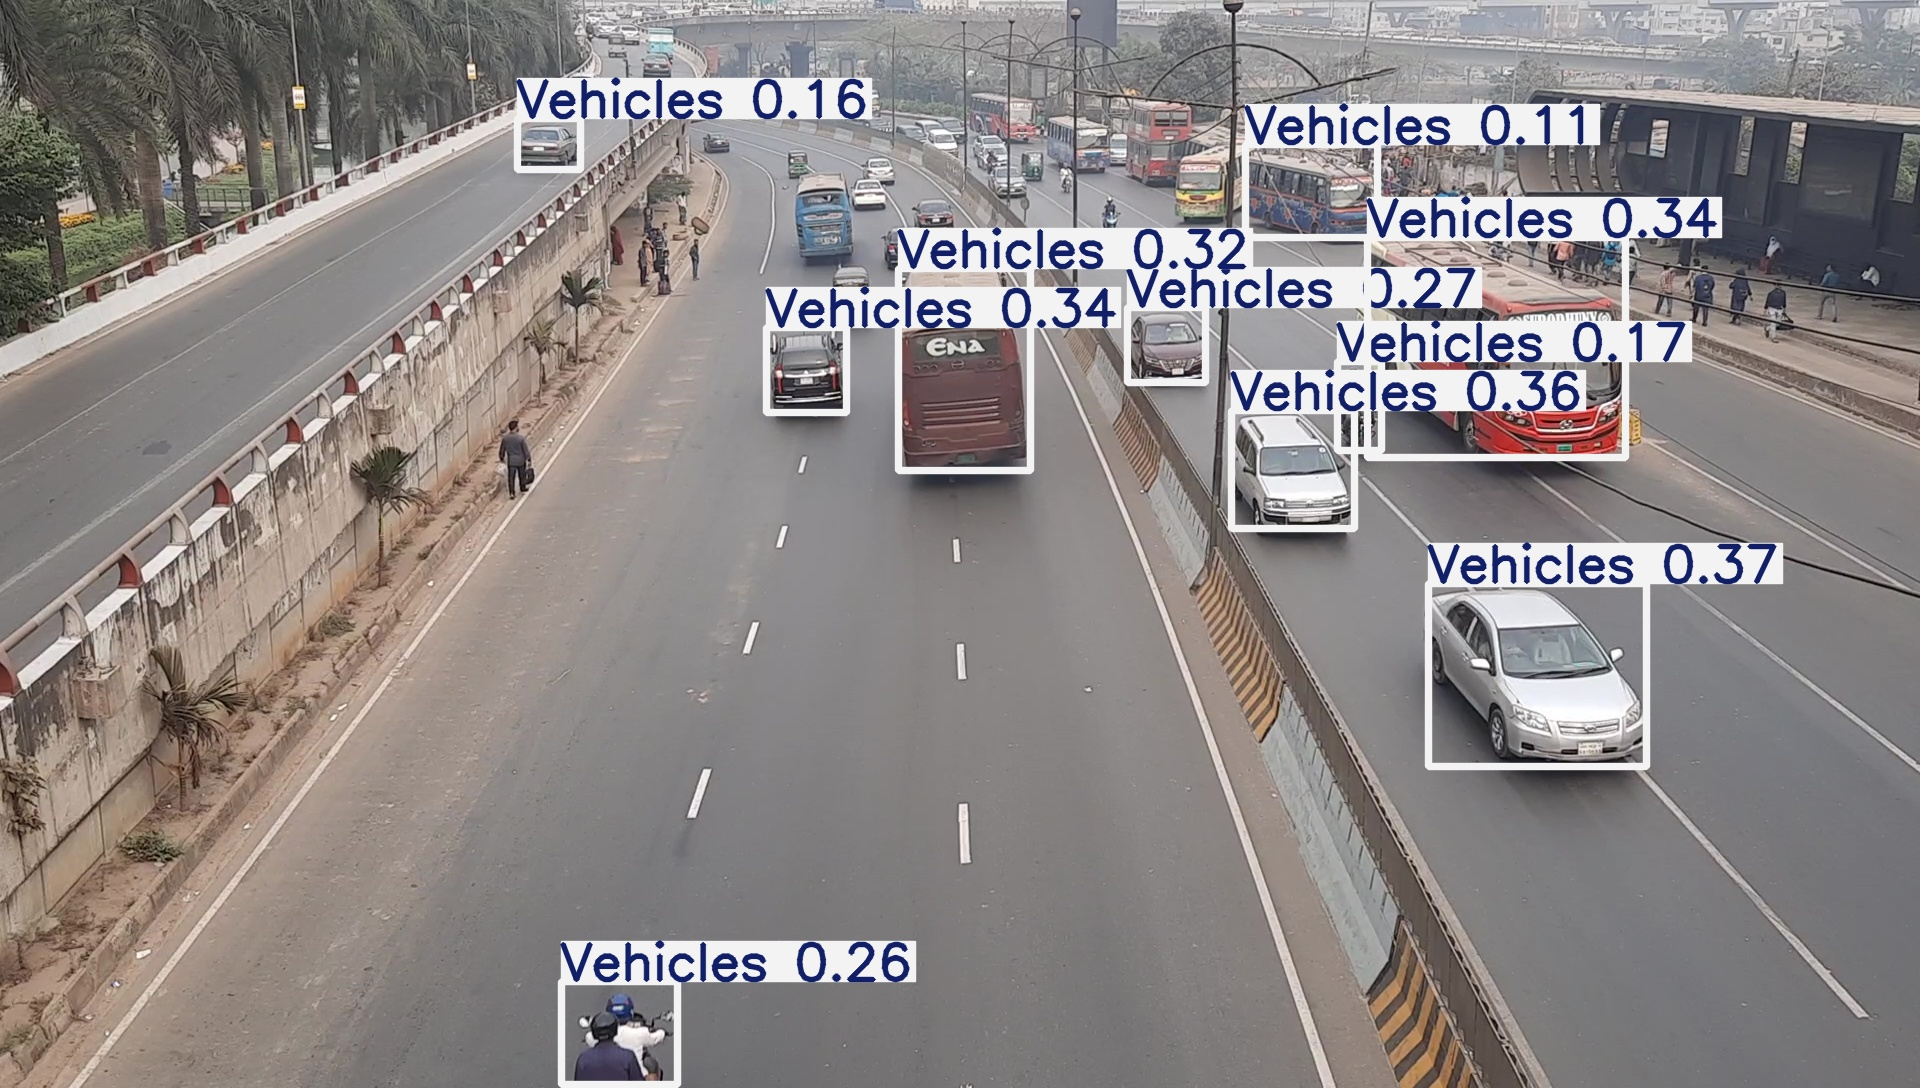

In [ ]:
results = model.predict(source=test_image, save=True, conf=0.1)

# Display result
result_image_path = "runs/detect/predict/" + os.path.basename(test_image)
display(Image(filename=result_image_path))


In [ ]:
test_image = "/content/drive/MyDrive/Data/images/train/1156515b1c0490fe.jpg"  # Update this